In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from preprocess import prep_all_stoch, prep_stoch_mod, prep_movavg_mod
from tradesim_stoch import simulate as sim_alt
from tradesim_stoch_daily import simulate
from tradesim_sma_daily import sim_buy_hold_eq
import matplotlib.pyplot as plt

In [2]:
df_xlvtick = pd.read_csv('XLV.csv')
tick_list = df_xlvtick['Ticker'].tolist()
df_dict = prep_stoch_mod(tick_list)
start = pd.to_datetime('12/22/98')
end = pd.to_datetime('01/06/21')
funds = 1000000
df_dict2 = prep_movavg_mod(tick_list)

In [5]:
stoch_funds, stoch_current_val, stoch_fund_df = simulate(funds, df_dict, start, end)

In [6]:
funds, current_val, fund_df = sim_buy_hold_eq(funds, df_dict2, start, end)

In [23]:
stoch_funds

3854109.279144536

## Performance of Alternate MACD strategies (monthly, 2-month, 6-month)

In [40]:
# monthly adjustment strategy
funds = 1000000
days = 21
cycle = 264
df_list = prep_all_stoch(tick_list)

In [41]:
stoch_1_fund_df, stoch_1_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [42]:
stoch_1_fund_df

,date,curr_fund,num_stocks
0,1998-12-22,1000000,0
1,1999-01-25,1328282.828283,1
2,1999-02-24,1374501.097215,3
3,1999-03-25,1560505.155078,2
4,1999-04-26,1608236.488215,13
...,...,...,...
260,2020-09-03,77711376.097965,3
261,2020-10-05,67923591.15757,1
262,2020-11-03,66885285.059754,3
263,2020-12-03,71492642.360908,9


In [43]:
# bimonthly adjustment strategy
funds = 1000000
days = 42
cycle = 132

In [44]:
stoch_2_fund_df, stoch_2_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [45]:
# biannual adjustment strategy
funds = 1000000
days = 126
cycle = 44

In [46]:
stoch_6_fund_df, stoch_6_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [47]:
#annual adjustment strategy
funds = 1000000
days = 252
cycle = 22

In [48]:
stoch_12_fund_df, stoch_12_final_funds = sim_alt(funds, df_list, start, days, cycle)

## Period return graph

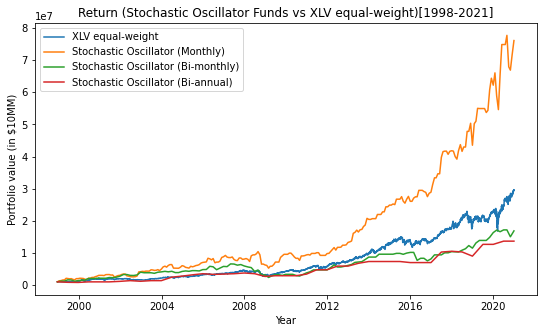

In [49]:
# full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Portfolio value (in $10MM)')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(stoch_1_fund_df['date'], stoch_1_fund_df['curr_fund'], label='Stochastic Oscillator (Monthly)')
ax.plot(stoch_2_fund_df['date'], stoch_2_fund_df['curr_fund'], label='Stochastic Oscillator (Bi-monthly)')
ax.plot(stoch_6_fund_df['date'], stoch_6_fund_df['curr_fund'], label='Stochastic Oscillator (Bi-annual)')
#ax.plot(stoch_12_fund_df['date'], stoch_12_fund_df['curr_fund'], label='Stochastic Oscillator (Annual)')
ax.legend()
ax.set_title('Return (Stochastic Oscillator Funds vs XLV equal-weight)[1998-2021]')
plt.savefig('stoch_all_22_Year_Return.png')

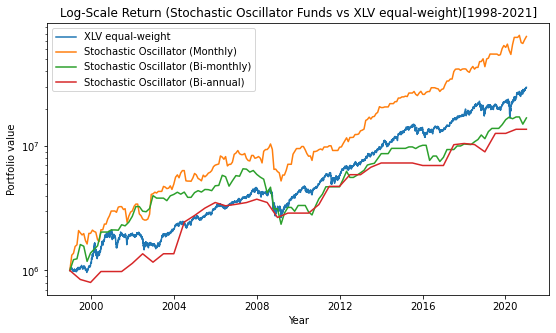

In [19]:
# log scale full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(9,5))
ax.set_yscale('log')
ax.set_ylabel('Portfolio value')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(stoch_1_fund_df['date'], stoch_1_fund_df['curr_fund'], label='Stochastic Oscillator (Monthly)')
ax.plot(stoch_2_fund_df['date'], stoch_2_fund_df['curr_fund'], label='Stochastic Oscillator (Bi-monthly)')
ax.plot(stoch_6_fund_df['date'], stoch_6_fund_df['curr_fund'], label='Stochastic Oscillator (Bi-annual)')
ax.legend()
ax.set_title('Log-Scale Return (Stochastic Oscillator Funds vs XLV equal-weight)[1998-2021]')
plt.savefig('stoch_log_22_Year_Return.png')

### Sharpe Ratios for MACD strategies

In [25]:
stoch_df_pct = stoch_fund_df.iloc[::252,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

In [26]:
#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
stoch_df_pct = stoch_df_pct - risk_free

In [27]:
mean = stoch_df_pct.mean()
stdev = stoch_df_pct.std()

mean,stdev

(curr_fund    0.045371
 dtype: float64,
 curr_fund    0.062196
 dtype: float64)

In [28]:
stoch_sharpe = mean / stdev
stoch_sharpe

curr_fund    0.729487
dtype: float64

In [29]:
#1month
stoch_1_df_pct = stoch_1_fund_df.iloc[::12,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
stoch_1_df_pct = stoch_1_df_pct - risk_free

mean = stoch_1_df_pct.mean()
stdev = stoch_1_df_pct.std()

mean,stdev

(curr_fund    0.224292
 dtype: float64,
 curr_fund    0.267464
 dtype: float64)

In [30]:
stoch_1_sharpe = mean / stdev
stoch_1_sharpe

curr_fund    0.838589
dtype: float64

In [31]:
#2month
stoch_2_df_pct = stoch_2_fund_df.iloc[::6,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
stoch_2_df_pct = stoch_2_df_pct - risk_free

mean = stoch_2_df_pct.mean()
stdev = stoch_2_df_pct.std()

mean,stdev

(curr_fund    0.143341
 dtype: float64,
 curr_fund    0.229257
 dtype: float64)

In [32]:
stoch_2_sharpe = mean / stdev
stoch_2_sharpe

curr_fund    0.62524
dtype: float64

In [33]:
#6month
stoch_6_df_pct = stoch_6_fund_df.iloc[::2,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
stoch_6_df_pct = stoch_6_df_pct - risk_free

mean = stoch_6_df_pct.mean()
stdev = stoch_6_df_pct.std()

mean,stdev

(curr_fund    0.135076
 dtype: float64,
 curr_fund    0.276669
 dtype: float64)

In [34]:
stoch_6_sharpe = mean / stdev
stoch_6_sharpe

curr_fund    0.488221
dtype: float64

In [35]:
#12month
stoch_12_df_pct = stoch_12_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
stoch_12_df_pct = stoch_12_df_pct - risk_free

mean = stoch_12_df_pct.mean()
stdev = stoch_12_df_pct.std()

mean,stdev

(curr_fund    0.194565
 dtype: float64,
 curr_fund    0.411193
 dtype: float64)

In [36]:
stoch_12_sharpe = mean / stdev
stoch_12_sharpe

curr_fund    0.473172
dtype: float64

## Relationship between number of stocks in portfolio and return

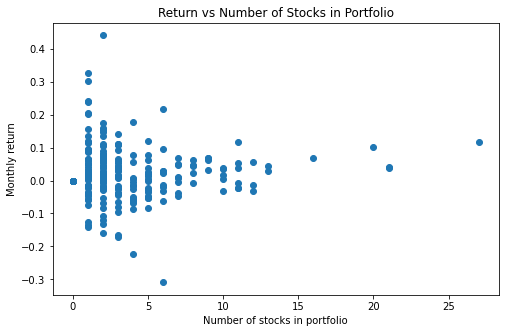

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
stoch_1_pct_monthly = stoch_1_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Monthly return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(stoch_1_fund_df.iloc[1:]['num_stocks'], stoch_1_pct_monthly['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('Stoch_1_Return_vs_num_stock.png')